# Imports

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk

# Get dataset and show

In [2]:
file_path = '/home/daniele/x_twitter_engagement/data/dataset_twitter-scraper_2024-03-15_14-22-12-784.csv'
df = pd.read_csv(file_path)

df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user/profile_image_url_https,user/screen_name,user/statuses_count,user/translator_type,user/verified,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count
0,1519480761749016577,2022-04-28T00:56:58.000Z,4519149,Next I’m buying Coca-Cola to put the cocaine b...,1519480761749016577,False,False,False,False,NaN,...,https://pbs.twimg.com/profile_images/168332538...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN
1,1518623997054918657,2022-04-25T16:12:30.000Z,3054758,I hope that even my worst critics remain on Tw...,1518623997054918657,False,False,False,False,NaN,...,https://pbs.twimg.com/profile_images/168332538...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN
2,1519495072802390016,2022-04-28T01:53:50.000Z,2499261,Let’s make Twitter maximum fun!,1519495072802390016,False,False,False,False,NaN,...,https://pbs.twimg.com/profile_images/168332538...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN
3,1518677066325053441,2022-04-25T19:43:22.000Z,2466722,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,1518677066325053441,False,False,False,False,https://pbs.twimg.com/media/FRNsuSFWUAUW6aP.jpg,...,https://pbs.twimg.com/profile_images/168332538...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN
4,1519495982723084290,2022-04-28T01:57:27.000Z,2429989,"Listen, I can’t do miracles ok https://t.co/z7...",1519495982723084290,False,False,False,False,https://pbs.twimg.com/media/FRZViwWX0AMsqQ1.jpg,...,https://pbs.twimg.com/profile_images/168332538...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN


# Create a function to clean the tweets and add to dataframe

In [3]:
def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

df['cleaned_text'] = df['full_text'].apply(cleantwt)

# Remove blank and check duplicated

In [4]:
df.drop(df[df['cleaned_text'] == ''].index, inplace = True)
df.duplicated().sum()

df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user/screen_name,user/statuses_count,user/translator_type,user/verified,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text
0,1519480761749016577,2022-04-28T00:56:58.000Z,4519149,Next I’m buying Coca-Cola to put the cocaine b...,1519480761749016577,False,False,False,False,NaN,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,Next I’m buying Coca-Cola to put the cocaine b...
1,1518623997054918657,2022-04-25T16:12:30.000Z,3054758,I hope that even my worst critics remain on Tw...,1518623997054918657,False,False,False,False,NaN,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,I hope that even my worst critics remain on Tw...
2,1519495072802390016,2022-04-28T01:53:50.000Z,2499261,Let’s make Twitter maximum fun!,1519495072802390016,False,False,False,False,NaN,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,Let’s make Twitter maximum fun!
3,1518677066325053441,2022-04-25T19:43:22.000Z,2466722,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,1518677066325053441,False,False,False,False,https://pbs.twimg.com/media/FRNsuSFWUAUW6aP.jpg,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,Yesss!!!
4,1519495982723084290,2022-04-28T01:57:27.000Z,2429989,"Listen, I can’t do miracles ok https://t.co/z7...",1519495982723084290,False,False,False,False,https://pbs.twimg.com/media/FRZViwWX0AMsqQ1.jpg,...,elonmusk,40099,none,True,NaN,NaN,NaN,NaN,NaN,"Listen, I can’t do miracles ok"


# Create TextBlob sentiment functions

In [5]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create NLTK sentiment functions

In [6]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/daniele/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Apply Sentiment Functions

In [7]:
df['textblob_polarity'] = df['cleaned_text'].apply(getPolarity)
df['textblob_subjectivity'] = df['cleaned_text'].apply(getSubjectivity)
df['nltk_polarity'] = df['cleaned_text'].apply(get_sentiment)

df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user/verified,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text,textblob_polarity,textblob_subjectivity,nltk_polarity
0,1519480761749016577,2022-04-28T00:56:58.000Z,4519149,Next I’m buying Coca-Cola to put the cocaine b...,1519480761749016577,False,False,False,False,NaN,...,True,NaN,NaN,NaN,NaN,NaN,Next I’m buying Coca-Cola to put the cocaine b...,0.000,0.0,0.0000
1,1518623997054918657,2022-04-25T16:12:30.000Z,3054758,I hope that even my worst critics remain on Tw...,1518623997054918657,False,False,False,False,NaN,...,True,NaN,NaN,NaN,NaN,NaN,I hope that even my worst critics remain on Tw...,-0.300,0.9,-0.0258
2,1519495072802390016,2022-04-28T01:53:50.000Z,2499261,Let’s make Twitter maximum fun!,1519495072802390016,False,False,False,False,NaN,...,True,NaN,NaN,NaN,NaN,NaN,Let’s make Twitter maximum fun!,0.375,0.2,0.5562
3,1518677066325053441,2022-04-25T19:43:22.000Z,2466722,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,1518677066325053441,False,False,False,False,https://pbs.twimg.com/media/FRNsuSFWUAUW6aP.jpg,...,True,NaN,NaN,NaN,NaN,NaN,Yesss!!!,0.000,0.0,0.0000
4,1519495982723084290,2022-04-28T01:57:27.000Z,2429989,"Listen, I can’t do miracles ok https://t.co/z7...",1519495982723084290,False,False,False,False,https://pbs.twimg.com/media/FRZViwWX0AMsqQ1.jpg,...,True,NaN,NaN,NaN,NaN,NaN,"Listen, I can’t do miracles ok",0.500,0.5,0.2960


In [8]:
def getTBSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['textblob_sentiment'] = df['textblob_polarity'].apply(getTBSentiment)
df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text,textblob_polarity,textblob_subjectivity,nltk_polarity,textblob_sentiment
0,1519480761749016577,2022-04-28T00:56:58.000Z,4519149,Next I’m buying Coca-Cola to put the cocaine b...,1519480761749016577,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Next I’m buying Coca-Cola to put the cocaine b...,0.000,0.0,0.0000,Neutral
1,1518623997054918657,2022-04-25T16:12:30.000Z,3054758,I hope that even my worst critics remain on Tw...,1518623997054918657,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,I hope that even my worst critics remain on Tw...,-0.300,0.9,-0.0258,Negative
2,1519495072802390016,2022-04-28T01:53:50.000Z,2499261,Let’s make Twitter maximum fun!,1519495072802390016,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Let’s make Twitter maximum fun!,0.375,0.2,0.5562,Positive
3,1518677066325053441,2022-04-25T19:43:22.000Z,2466722,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,1518677066325053441,False,False,False,False,https://pbs.twimg.com/media/FRNsuSFWUAUW6aP.jpg,...,NaN,NaN,NaN,NaN,NaN,Yesss!!!,0.000,0.0,0.0000,Neutral
4,1519495982723084290,2022-04-28T01:57:27.000Z,2429989,"Listen, I can’t do miracles ok https://t.co/z7...",1519495982723084290,False,False,False,False,https://pbs.twimg.com/media/FRZViwWX0AMsqQ1.jpg,...,NaN,NaN,NaN,NaN,NaN,"Listen, I can’t do miracles ok",0.500,0.5,0.2960,Positive


In [9]:
def getNLTKSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

df['nltk_sentiment'] = df['nltk_polarity'].apply(getNLTKSentiment)
df.head()

,conversation_id,created_at,favorite_count,full_text,id,is_pinned,is_quote_tweet,is_retweet,is_truncated,media/0/media_url,...,user_mentions/0/name,user_mentions/0/profile,user_mentions/0/screen_name,view_count,cleaned_text,textblob_polarity,textblob_subjectivity,nltk_polarity,textblob_sentiment,nltk_sentiment
0,1519480761749016577,2022-04-28T00:56:58.000Z,4519149,Next I’m buying Coca-Cola to put the cocaine b...,1519480761749016577,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Next I’m buying Coca-Cola to put the cocaine b...,0.000,0.0,0.0000,Neutral,Neutral
1,1518623997054918657,2022-04-25T16:12:30.000Z,3054758,I hope that even my worst critics remain on Tw...,1518623997054918657,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,I hope that even my worst critics remain on Tw...,-0.300,0.9,-0.0258,Negative,Negative
2,1519495072802390016,2022-04-28T01:53:50.000Z,2499261,Let’s make Twitter maximum fun!,1519495072802390016,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Let’s make Twitter maximum fun!,0.375,0.2,0.5562,Positive,Positive
3,1518677066325053441,2022-04-25T19:43:22.000Z,2466722,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6,1518677066325053441,False,False,False,False,https://pbs.twimg.com/media/FRNsuSFWUAUW6aP.jpg,...,NaN,NaN,NaN,NaN,Yesss!!!,0.000,0.0,0.0000,Neutral,Neutral
4,1519495982723084290,2022-04-28T01:57:27.000Z,2429989,"Listen, I can’t do miracles ok https://t.co/z7...",1519495982723084290,False,False,False,False,https://pbs.twimg.com/media/FRZViwWX0AMsqQ1.jpg,...,NaN,NaN,NaN,NaN,"Listen, I can’t do miracles ok",0.500,0.5,0.2960,Positive,Positive


In [11]:
textblob_counts = df['textblob_sentiment'].value_counts()
textblob_counts

textblob_sentiment
Neutral     32
Positive    29
Negative     9
Name: count, dtype: int64

In [12]:
nltk_counts = df['nltk_sentiment'].value_counts()
nltk_counts

nltk_sentiment
Positive    29
Neutral     27
Negative    14
Name: count, dtype: int64

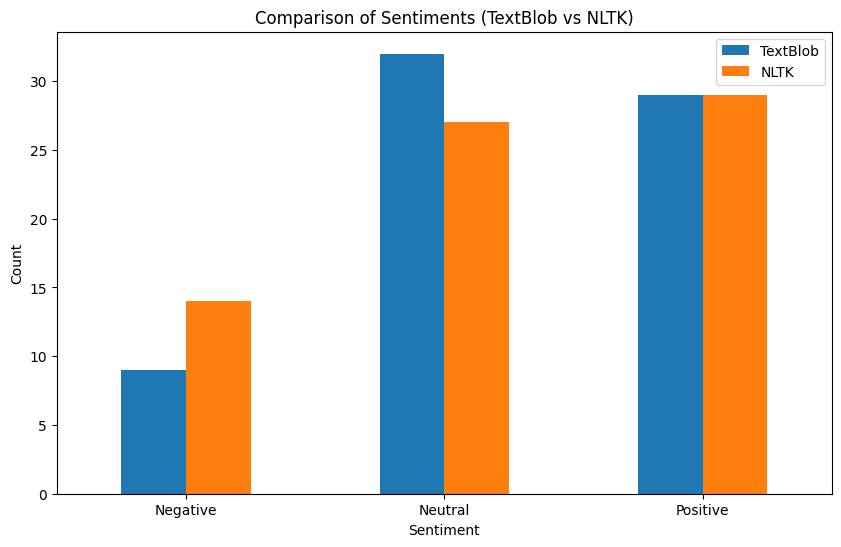

In [13]:
counts_df = pd.DataFrame({'TextBlob': textblob_counts, 'NLTK': nltk_counts})

# Plotar um gráfico de barras para comparar as contagens
ax = counts_df.plot(kind='bar', rot=0, figsize=(10, 6))
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Comparison of Sentiments (TextBlob vs NLTK)')
plt.show()